In [1]:
import pandas as pd
import datetime
import glob
import json
import matplotlib.pyplot as plt
import numpy as np
import bokeh
import seaborn as sns
import pandas_profiling

# File einlesen und formatieren:

In [2]:
#DF MEDIAN  OHNE BATTERIE:
#df= pd.read_csv("synt_ohne_bat_median.csv", error_bad_lines=False, sep=",")

#richtiges df:
df= pd.read_csv("../data/data3/synt_mit_bat_mittelwert.csv", error_bad_lines=False, sep=";")

In [3]:
df['DateTime'] = pd.to_datetime(df['DateTime'], format="%Y-%m-%d", utc=True)
df['DateTime'] = df['DateTime'].dt.tz_convert('Europe/Berlin')

In [4]:
df.dtypes

DateTime                            datetime64[ns, Europe/Berlin]
DevWork_97 [Energy_Ws]                                    float64
FromBattToConsumer_0 [Energy_Wh]                          float64
FromGenToBatt_0 [Energy_Wh]                               float64
FromGenToConsumer_0 [Energy_Wh]                           float64
FromGenToGrid_0 [Energy_Wh]                               float64
FromGridToConsumer_0 [Energy_Wh]                          float64
FromGrid_0 [Energy_Wh]                                    float64
StateOfCharge_254 [Percent]                               float64
ToConsumer_0 [Energy_Wh]                                  float64
dtype: object

In [5]:
#RENAME COLUMNS:

df.columns = ['DateTime', 'DevWork', 'FromBatToCons', 'FromGenToBat','FromGenToCons', 'FromGenToGrid','FromGridToCons','FromGrid','StateOfCharge' ,'ToCons']


'''
DF shape original:

DateTime                            datetime64[ns, Europe/Berlin]
DevWork_97 [Energy_Ws]                                    float64
FromBattToConsumer_0 [Energy_Wh]                            int64
FromGenToBatt_0 [Energy_Wh]                                 int64
FromGenToConsumer_0 [Energy_Wh]                           float64
FromGenToGrid_0 [Energy_Wh]                               float64
FromGridToConsumer_0 [Energy_Wh]                          float64
FromGrid_0 [Energy_Wh]                                    float64
ToConsumer_0 [Energy_Wh]                                  float64
dtype: object
'''

'\nDF shape original:\n\nDateTime                            datetime64[ns, Europe/Berlin]\nDevWork_97 [Energy_Ws]                                    float64\nFromBattToConsumer_0 [Energy_Wh]                            int64\nFromGenToBatt_0 [Energy_Wh]                                 int64\nFromGenToConsumer_0 [Energy_Wh]                           float64\nFromGenToGrid_0 [Energy_Wh]                               float64\nFromGridToConsumer_0 [Energy_Wh]                          float64\nFromGrid_0 [Energy_Wh]                                    float64\nToConsumer_0 [Energy_Wh]                                  float64\ndtype: object\n'

In [6]:
df['FromGen'] = df['FromGenToBat'] + df['FromGenToCons'] + df['FromGenToGrid'] 

In [7]:
# um den Mittelwert nicht zu verfälschen, wird 2021 entfernt, da hier nur der Zeitraum Jänner bis Anfang März verfügbar ist.
# so ergibt sich der Mittelwert aus den vollen Jahren 2017-2020

In [8]:
d2= df[(df['DateTime'].dt.year != 2021)]

# Durchschnittlichen Tag berechnen (Erzeugung, Verbrauch):

Es wird ein Subset aus der Überschussmenge gebildet (jeweils aggregiert nach Monat und Tag)
Außerdem erfolgt noch eine Umrechnung auf kWh um eine bessere Vergleichbarkeit zu ermöglichen.

In [9]:
df['Uhrzeit'] = df['DateTime'].dt.time

In [10]:
df.head()

,DateTime,DevWork,FromBatToCons,FromGenToBat,FromGenToCons,FromGenToGrid,FromGridToCons,FromGrid,StateOfCharge,ToCons,FromGen,Uhrzeit
0,2017-01-01 00:05:00+01:00,11940.30,3.81,0.0,0.0,0.0,39.65,39.65,20.23,43.46,0.0,00:05:00
1,2017-01-01 00:10:00+01:00,13675.57,4.31,0.0,0.0,0.0,44.69,44.70,20.08,49.01,0.0,00:10:00
2,2017-01-01 00:15:00+01:00,8791.61,2.90,0.0,0.0,0.0,46.38,46.39,20.00,49.28,0.0,00:15:00
3,2017-01-01 00:20:00+01:00,8645.13,2.74,0.0,0.0,0.0,41.69,41.70,19.85,44.43,0.0,00:20:00
4,2017-01-01 00:25:00+01:00,9079.74,2.90,0.0,0.0,0.0,44.09,44.13,19.77,46.99,0.0,00:25:00


In [11]:
df.dtypes

DateTime          datetime64[ns, Europe/Berlin]
DevWork                                 float64
FromBatToCons                           float64
FromGenToBat                            float64
FromGenToCons                           float64
FromGenToGrid                           float64
FromGridToCons                          float64
FromGrid                                float64
StateOfCharge                           float64
ToCons                                  float64
FromGen                                 float64
Uhrzeit                                  object
dtype: object

In [12]:
#df2 = df.groupby(pd.Grouper(key='Uhrzeit',freq='Min')).agg({'FromGen':'mean'}).reset_index()
#verbrauch = df.groupby(pd.Grouper(key='DateTime',freq='m')).agg({'ToCons':'sum'}).reset_index()

df2= df.groupby(by=["Uhrzeit"]).mean().reset_index()

In [13]:
df2.head(288)

,Uhrzeit,DevWork,FromBatToCons,FromGenToBat,FromGenToCons,FromGenToGrid,FromGridToCons,FromGrid,StateOfCharge,ToCons,FromGen
0,00:00:00,34294.052091,11.075538,0.000194,0.004081,0.000595,28.236399,28.329172,34.684870,39.309392,0.004870
1,00:05:00,33739.048024,10.908142,0.000210,0.003867,0.000663,27.839028,27.936218,34.476257,38.744393,0.004741
2,00:10:00,33364.448391,10.794228,0.000204,0.004202,0.000348,27.673933,27.782462,34.254202,38.465575,0.004754
3,00:15:00,33130.660335,10.717590,0.000210,0.003736,0.000709,27.396605,27.511399,34.029389,38.111320,0.004655
4,00:20:00,32273.477006,10.466074,0.000190,0.003388,0.000525,27.328825,27.448877,33.819731,37.791668,0.004104
...,...,...,...,...,...,...,...,...,...,...,...
283,23:35:00,38203.437431,12.224790,0.000210,0.004842,0.001025,29.382773,29.496124,35.837523,41.605769,0.006078
284,23:40:00,37196.041873,11.931590,0.000184,0.005112,0.000565,29.064520,29.182240,35.606971,40.994468,0.005861
285,23:45:00,36298.408469,11.669691,0.000151,0.004685,0.000762,28.916583,29.029166,35.381242,40.584067,0.005598
286,23:50:00,35383.240526,11.402766,0.000184,0.004185,0.000631,28.691498,28.811005,35.146524,40.091708,0.005000


In [14]:
df2.dtypes

Uhrzeit            object
DevWork           float64
FromBatToCons     float64
FromGenToBat      float64
FromGenToCons     float64
FromGenToGrid     float64
FromGridToCons    float64
FromGrid          float64
StateOfCharge     float64
ToCons            float64
FromGen           float64
dtype: object

In [15]:
df2.head()

,Uhrzeit,DevWork,FromBatToCons,FromGenToBat,FromGenToCons,FromGenToGrid,FromGridToCons,FromGrid,StateOfCharge,ToCons,FromGen
0,00:00:00,34294.052091,11.075538,0.000194,0.004081,0.000595,28.236399,28.329172,34.684870,39.309392,0.004870
1,00:05:00,33739.048024,10.908142,0.000210,0.003867,0.000663,27.839028,27.936218,34.476257,38.744393,0.004741
2,00:10:00,33364.448391,10.794228,0.000204,0.004202,0.000348,27.673933,27.782462,34.254202,38.465575,0.004754
3,00:15:00,33130.660335,10.717590,0.000210,0.003736,0.000709,27.396605,27.511399,34.029389,38.111320,0.004655
4,00:20:00,32273.477006,10.466074,0.000190,0.003388,0.000525,27.328825,27.448877,33.819731,37.791668,0.004104


In [16]:
import matplotlib.dates as mdates

Text(0, 0.5, 'Wh')

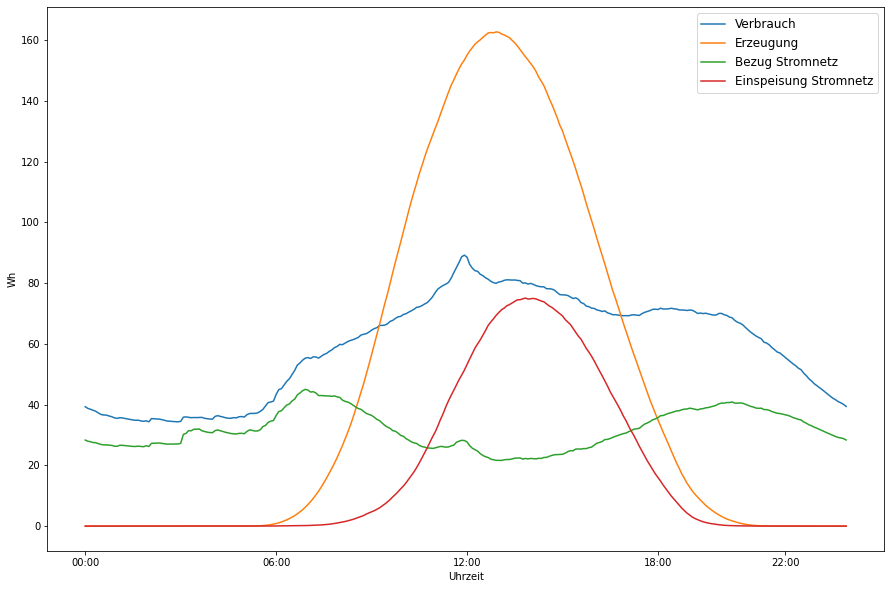

In [17]:
df2.plot(x='Uhrzeit', y=['ToCons', 'FromGen', 'FromGrid', 'FromGenToGrid'], figsize=(15,10))
plt.xticks(['00:00',"06:00", "12:00","18:00","22:00"])
plt.legend(['Verbrauch', 'Erzeugung','Bezug Stromnetz','Einspeisung Stromnetz'], fontsize='large')
plt.ylabel("Wh")


Text(0, 0.5, 'Wh')

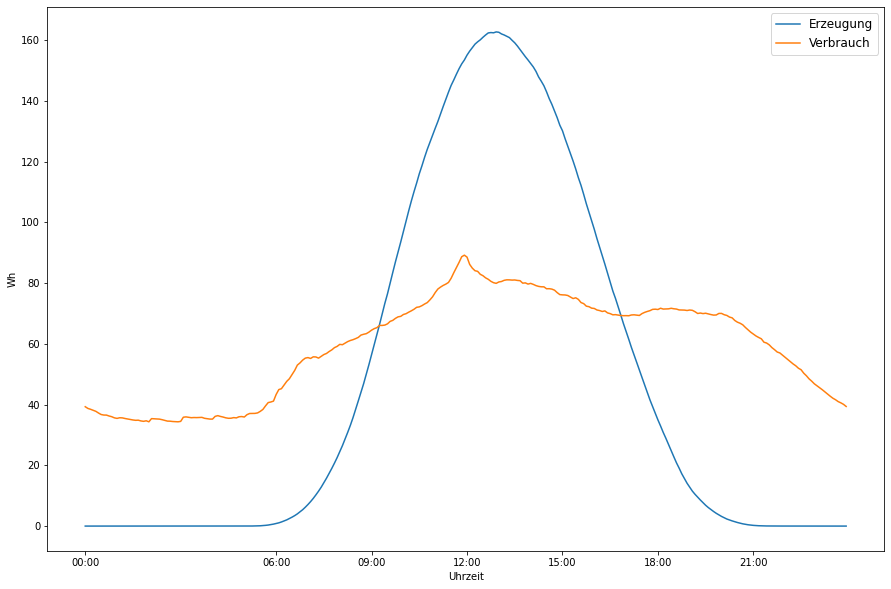

In [18]:
df2.plot(x='Uhrzeit', y=['FromGen', 'ToCons'], figsize=(15,10))
plt.xticks(['00:00',"06:00", "09:00", "12:00", "15:00","18:00","21:00"])
plt.legend(['Erzeugung', 'Verbrauch'], fontsize='large')
plt.ylabel("Wh")